# Imports
don't worry, they're duty free

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
#get that call free chat viewing going
%matplotlib inline

In [3]:
#set up the path
path=r'C:\Users\evras\Desktop\Projects\Project A6\01 Data'

In [4]:
#bring in the frame
df_bnb=pd.read_pickle(os.path.join(path,'02 Altered','us_airbnb_2_states.pkl'))

In [5]:
#now that good old fashioned discount double check
df_bnb.head()

,listing_id,listing_name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,city,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listing_count,availability_365,state
0,38585,Charming Victorian home - twin beds + breakfast,165529,None,28804,35.65146,-82.62792,Asheville,Private room,60,1,138,16/02/20,1.14,1,0,North Carolina
1,80905,French Chic Loft,427027,None,28801,35.59779,-82.55540,Asheville,Entire home/apt,470,1,114,7/9/2020,1.03,11,288,North Carolina
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,None,28801,35.60670,-82.55563,Asheville,Entire home/apt,75,30,89,30/11/19,0.81,2,298,North Carolina
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,None,28806,35.57864,-82.59578,Asheville,Entire home/apt,90,1,267,22/09/20,2.39,5,0,North Carolina
4,160594,Historic Grove Park,769252,None,28801,35.61442,-82.54127,Asheville,Private room,125,30,58,19/10/15,0.52,1,0,North Carolina


In [6]:
df_bnb.shape

(226000, 17)

In [7]:
df_bnb.columns

Index(['listing_id', 'listing_name', 'host_id', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'city', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'host_listing_count', 'availability_365', 'state'],
      dtype='object')

looking good, time to move on to...

# Prep time!

In [8]:
#so we know k-means doesn't like categoricals so we'll slim down to the continuous ones
df_cont=df_bnb[['price','minimum_nights', 'number_of_reviews','reviews_per_month',
                'host_listing_count', 'availability_365']]

In [9]:
df_cont

,price,minimum_nights,number_of_reviews,reviews_per_month,host_listing_count,availability_365
0,60,1,138,1.14,1,0
1,470,1,114,1.03,11,288
2,75,30,89,0.81,2,298
3,90,1,267,2.39,5,0
4,125,30,58,0.52,1,0
...,...,...,...,...,...,...
226024,104,1,0,0.00,2,99
226025,151,2,0,0.00,1,300
226026,240,2,0,0.00,1,173
226027,60,21,0,0.00,5,362


also, in the interest of free nights or nights for billionaires only not throwing a wrench in all of this I'm going to do the same price limit I did before.

In [10]:
df_cont=df_cont.query('price>=10 and price<=3000 and minimum_nights <=365')

# Elbow Curve
some people call it the weenus, but technically it's called olecranal skin...

In [11]:
#start with setting the number of cluster posibilities to an object
num_cl=range(1,10)

In [12]:
# now we make sure it knows to do a range of tests set up in the num_cul
kmeans=[KMeans(n_clusters=i)for i in num_cl]

In [13]:
# Now for some testing! the answers will be revealed soon
score=[kmeans[i].fit(df_cont).score(df_cont)for i in range (len(kmeans))]

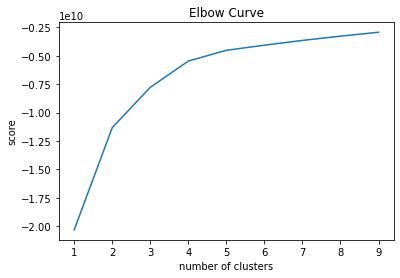

In [14]:
# TELL ME WHAT YOU SEE OH GREAT ELBOW TEST
pl.plot(num_cl,score)
pl.xlabel('number of clusters')
pl.ylabel('score')
pl.title('Elbow Curve')
pl.show()

I'm going to be honest, I really thought this was going to turn into some wacky line. Glad it didn't.

I'm going with 5 clusters. It's a lot but honestly it looks like the best point on the grid.

# K is for cluster
I don't know if you know who sue grafton is but... it's sort of funny trust me.

In [15]:
# Let's make an object!
kmeans=KMeans(n_clusters=5,n_jobs=-1) 
#this is being depreciataed? I read online that it's just doing all cores by default but when I run it w/o the n_jobs it just gets an error...

In [16]:
# Make the object (well model I suppose) fit on our data set!
kmeans.fit(df_cont)

C:\Users\evras\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=5, n_jobs=-1)

In [17]:
#add a new column for the clusters
df_cont['clusters']=kmeans.fit_predict(df_cont)

C:\Users\evras\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-17-7c3ba4508311>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cont['clusters']=kmeans.fit_predict(df_cont)


In [18]:
df_cont.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,host_listing_count,availability_365,clusters
0,60,1,138,1.14,1,0,0
1,470,1,114,1.03,11,288,2
2,75,30,89,0.81,2,298,3
3,90,1,267,2.39,5,0,0
4,125,30,58,0.52,1,0,0


In [19]:
df_cont['clusters'].value_counts()

0    118274
3     74872
2     24063
4      6301
1      1456
Name: clusters, dtype: int64

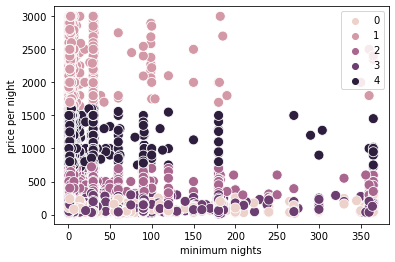

In [20]:
#well 0 sure is a popular cluster....
#now for the plot reveal
plt.figure_figsize=(12,8)
ax=sns.scatterplot(x=df_cont['minimum_nights'],y=df_cont['price'], hue=kmeans.labels_,s=100)

ax.grid(False)
plt.xlabel('minimum nights')
plt.ylabel('price per night')
plt.show()

So, the interesting thing to me here is that clusters 0, 3, and 5 are the most distinct. 1 and two are sort of muddled together. Something to note here is the more expensive a room is the _less_ likely it is to be rentable for more than a couple of months.

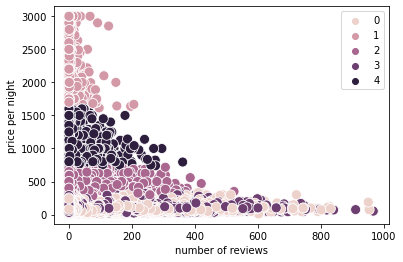

In [21]:
plt.figure_figsize=(12,8)
ax=sns.scatterplot(x=df_cont['number_of_reviews'],y=df_cont['price'], hue=kmeans.labels_,s=100)

ax.grid(False)
plt.xlabel('number of reviews')
plt.ylabel('price per night')
plt.show()

Once again we see the 0,3,4 are the most consistent clusters.

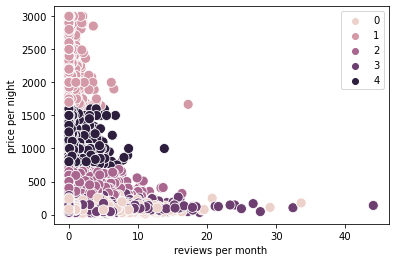

In [22]:
plt.figure_figsize=(12,8)
ax=sns.scatterplot(x=df_cont['reviews_per_month'],y=df_cont['price'], hue=kmeans.labels_,s=100)

ax.grid(False)
plt.xlabel('reviews per month')
plt.ylabel('price per night')
plt.show()

and again

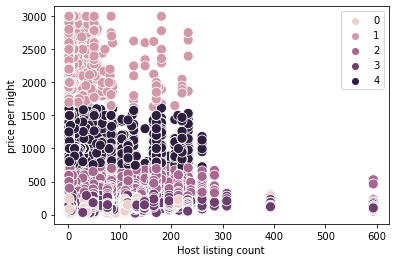

In [23]:
plt.figure_figsize=(12,8)
ax=sns.scatterplot(x=df_cont['host_listing_count'],y=df_cont['price'], hue=kmeans.labels_,s=100)

ax.grid(False)
plt.xlabel('Host listing count')
plt.ylabel('price per night')
plt.show()

and again....

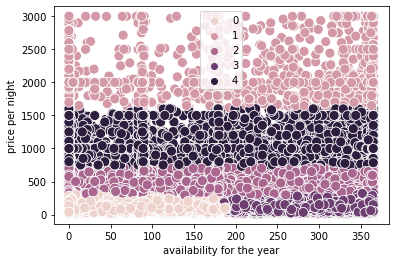

In [24]:
plt.figure_figsize=(12,8)
ax=sns.scatterplot(x=df_cont['availability_365'],y=df_cont['price'], hue=kmeans.labels_,s=100)

ax.grid(False)
plt.xlabel('availability for the year')
plt.ylabel('price per night')
plt.show()

well now they're all pretty distinct _but_ all of these charts have given me a thought. That being, if all the other variables don't impact price _maybe price impacts them_.

# Looking into it

In [25]:
#let's set up the color scheme labels in the data frame so future refrance is easy
df_cont.loc[df_cont['clusters']==0,'clusters']='Light Pink'
df_cont.loc[df_cont['clusters']==1,'clusters']='Pink'
df_cont.loc[df_cont['clusters']==2,'clusters']='Light Purple'
df_cont.loc[df_cont['clusters']==3,'clusters']='Purple'
df_cont.loc[df_cont['clusters']==4,'clusters']='Dark Purple'

C:\Users\evras\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [26]:
#now we agrrogate and take a gander
df_cont.groupby('clusters').agg({'price':['mean','median'],
                                'minimum_nights':['mean','median'],
                                #'number_of_reviews':['mean','median'], These two weren't helping so I blocked them out
                                #'reviews_per_month':['mean','median'],
                                'host_listing_count':['mean','median'],
                                'availability_365':['mean','median']})

price        minimum_nights        host_listing_count  \
                     mean median           mean median               mean   
clusters                                                                    
Dark Purple   1029.169497    999       7.604031      3          20.085859   
Light Pink     114.433054     99       8.715601      2           8.336211   
Light Purple   426.742301    400       7.333874      3          21.836222   
Pink          2195.294643   2000      10.687500      3          14.140110   
Purple         130.854245    120      12.804480      3          27.923095   

                    availability_365         
             median             mean median  
clusters                                     
Dark Purple       2       195.019362    216  
Light Pink        1        53.614480     21  
Light Purple      2       177.960770    178  
Pink              2       184.494505    180  
Purple            3       316.651044    336

I think something we can gather from this list is that listings in the Pink range, are perhaps the most often booked. Which leads me note that they're also probably the most profitable. If we consider pricing as an indicator of anything, it is that when listings are priced lower the following is also true: they tend to be for fewer nights (which could mean higher turn around), they tend to have hosts that have fewer than 10 listings (more often than not only 1), and finally they have the smallest availability. To me this suggest that those in the Pink range (for the most part), are _the actual target host demographic_. Which is to say homeowners who are renting out their homes while out on vacation somewhere else. Which was always the primary point of Airbnb. Make some money while you aren't in your house. Its initial purpose was never for real estate moguls to do sketchy short-term rentals. Allegedly but, I digress.

I think Pink and Light Purple deserve a good look. Despite both being in the middle of the price range, they're polar opposites in every single other category. While there doesn't appear to be a causal link between price and any other factor, we can look at here. I do like that if we stay in a particular price range, we can wind up with some reasonably predictable results. Which leads me to my final thought, that while all of the other factors might not influence price, I think price influence them. Not a ton mind you, I think a model built off of that notion would require some _serious_ fine tuning because I think other things are bigger impactors than what I have access to. However, it seems like an interesting starting place if nothing else.

I've been focusing a lot on price. Which, when you look my old corrmap is an odd choice because it has the least correlation between any other thing. However, _I think that's super interesting_, and is why it's been my point of focus. The more I go down this rabbit hole the more I realize that price isn't a result of all the other bits and bobs of information I have, they're all results of other things. The Airbnb market initially seemed to me like a sort of Ebay for physical space. I'm realizing however that it is more like the ice cream sales example we keep going back to in the lessons. It's less about the features of the products, and more about the circumstances surrounding it. People don't charge more because they have more or less availability, or because they have more listings. They charge more because of external factors. Things that don't get listed in the Airbnb databases. Conventions, nearby resorts or theme parks, times of year.

Initially I was disappointed by the lack of correlation amongst the various variables in this set. Well, aside from number of reviews and reviews per month, but one is literally derived from the other so there is no shock there. The point is, what I've learned from this set that I think is _super_ valuable, is that the answer isn't always in the numbers you have and that testing and digging over and over is sometimes the only to irrefutably prove that, and in this case, I feel like I really have now.

So that's cool.